In [49]:
import pathlib
from itertools import chain

import pandas as pd
import matplotlib.pyplot as plt
from Bio import Phylo
from elyawy.constants import length_distributions

plt.style.use('seaborn-v0_8-colorblind')

In [106]:
dataset = 'yeast'
corrected = False
REMOTE_PATH = pathlib.Path("/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/").resolve() # sys.argv[2]
REMOTE_PATH = REMOTE_PATH / dataset
all_outputs_path = pathlib.Path(REMOTE_PATH).resolve()
# all_outputs_path = chain(all_outputs_path.glob("*Primates*"),all_outputs_path.glob("*Rodent*"))

all_outputs_path = list(all_outputs_path.iterdir())



In [107]:
# all_outputs_path = pathlib.Path("../all_outputs/results_rerun",dataset).resolve()
all_outputs_path = [folder for folder in all_outputs_path if (folder / "epsilon.csv").exists()]


# sum_branches = []
# filtered_outputs_path = []
# for dir_name in all_outputs_path:
#     tree_path = (dir_name / f"{dir_name.stem}_NT.tree").resolve()
#     tree = Phylo.read(tree_path, 'newick')
#     sum_branch_lengths = tree.total_branch_length()
#     if sum_branch_lengths > 7:
#         sum_branches.append(sum_branch_lengths)
#         filtered_outputs_path.append(dir_name)

# all_outputs_path = filtered_outputs_path

abc_winner = []
duplicate_count = 0
for dir_name in all_outputs_path:
    if corrected:
        epsilon_results = pathlib.Path(dir_name, "epsilon.csv")
    else:
        epsilon_results = pathlib.Path(dir_name, "epsilon_mahal_100000_non_corrected.csv")

    temp_df = pd.read_csv(epsilon_results, index_col=0)
    temp_df = temp_df.fillna(0.0).astype('float')
    def get_max(x):
        sorted_x = x.sort_values(ascending=False)
        if len(sorted_x) == 1 or sorted_x[0] > sorted_x[1]:
            return sorted_x.index[0]
        if len(sorted_x) == 2 or sorted_x[1] > sorted_x[2]:
            return ",".join(sorted(sorted_x.index[:2]))
        return ",".join(sorted_x.index)
    abc_winner.append(temp_df.apply(get_max, axis=0))

corrected = "corrected" if corrected else "not_corrected"


In [108]:
new_df  = pd.concat(abc_winner, axis=1)
new_df.columns = [i.stem for i in all_outputs_path]
new_df

,seqal_chrII_332874-333384_+_YBR048W,seqal_chrII_393176-393505_+_YBR078W,seqal_chrII_60190-60693_-_YBL087C,seqal_chrII_604510-604922_+_YBR189W,seqal_chrII_606276-606663_+_YBR191W,seqal_chrIV_117668-118158_+_YDL191W,seqal_chrIV_1359963-1360397_+_YDR450W,seqal_chrIV_307334-307765_-_YDL083C,seqal_chrIV_322283-322703_+_YDL075W,seqal_chrIV_491558-491896_+_YDR025W,...,seqal_chrXV_678381-678791_-_YOR182C,seqal_chrXV_778861-779387_-_YOR234C,seqal_chrXV_867149-867585_+_YOR293W,seqal_chrXV_900765-901190_-_YOR312C,seqal_chrXV_92441-92830_-_YOL121C,seqal_chrXV_93844-94290_-_YOL120C,seqal_chrX_156786-157245_-_YJL136C,seqal_chrX_73796-74203_+_YJL191W,seqal_chrX_75938-76323_+_YJL189W,seqal_chrX_91093-91409_+_YJL177W
10,zipf,geometric,zipf,zipf,geometric,zipf,geometric,"geometric,zipf",zipf,"poisson,zipf",...,zipf,zipf,"geometric,zipf",geometric,geometric,"geometric,zipf",geometric,zipf,geometric,zipf
25,zipf,geometric,zipf,zipf,geometric,zipf,geometric,zipf,zipf,poisson,...,zipf,zipf,geometric,geometric,geometric,zipf,geometric,zipf,geometric,zipf
50,zipf,geometric,zipf,zipf,geometric,zipf,geometric,zipf,zipf,poisson,...,zipf,zipf,geometric,geometric,geometric,zipf,geometric,zipf,geometric,zipf
100,zipf,geometric,zipf,zipf,geometric,zipf,geometric,geometric,zipf,poisson,...,zipf,zipf,geometric,geometric,geometric,zipf,geometric,zipf,geometric,zipf
250,zipf,geometric,zipf,zipf,geometric,zipf,geometric,geometric,zipf,poisson,...,zipf,zipf,geometric,geometric,geometric,zipf,geometric,zipf,geometric,zipf
500,zipf,geometric,zipf,zipf,geometric,zipf,geometric,poisson,zipf,poisson,...,zipf,zipf,geometric,geometric,geometric,zipf,geometric,zipf,geometric,zipf
1000,zipf,geometric,zipf,geometric,geometric,zipf,geometric,geometric,zipf,poisson,...,zipf,zipf,geometric,geometric,geometric,zipf,geometric,zipf,geometric,zipf


In [109]:
summary_res = new_df.apply(lambda x: x.value_counts(), axis=1)
summary_res = summary_res.fillna(0)
summary_res

,geometric,"geometric,zipf",poisson,"poisson,zipf",zipf
10,21.0,4.0,1.0,2.0,39.0
25,24.0,0.0,3.0,1.0,39.0
50,22.0,0.0,4.0,0.0,41.0
100,21.0,0.0,4.0,0.0,42.0
250,22.0,1.0,5.0,0.0,39.0
500,25.0,0.0,6.0,0.0,36.0
1000,27.0,0.0,5.0,0.0,35.0


In [110]:
summary_res = summary_res[length_distributions]
summary_res = summary_res.loc["100"]

In [111]:
(summary_res/summary_res.sum() *100).to_csv(f"{dataset}_{corrected}.csv")

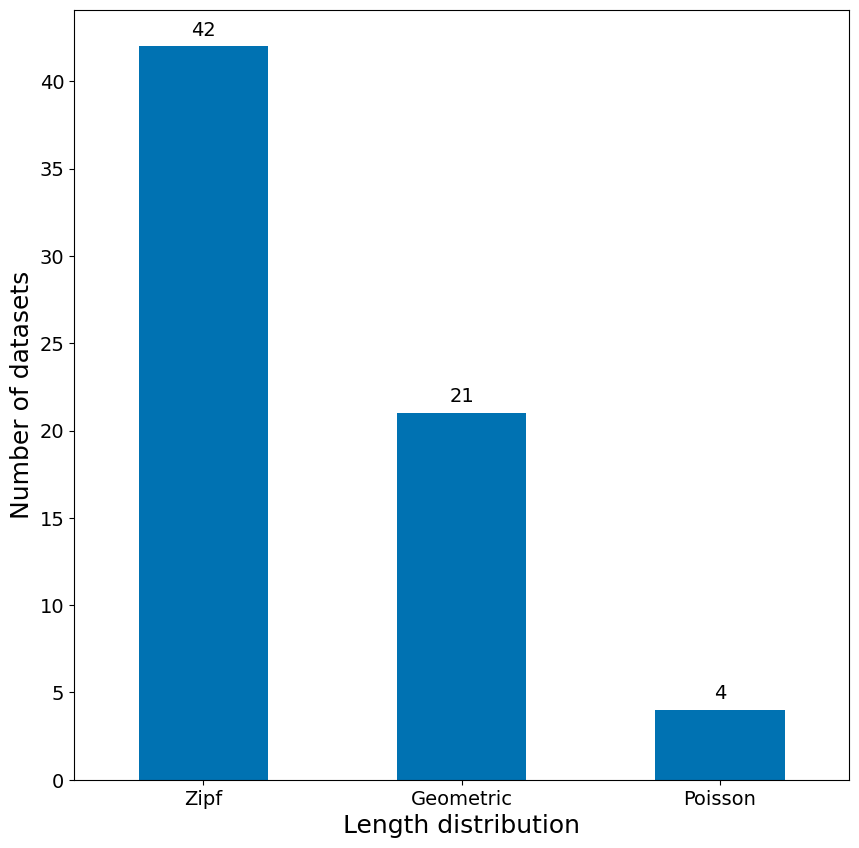

In [112]:
# summary_res.to_csv(f"true_epsilon_summary_{dataset}.csv")
fig, ax = plt.subplots(figsize=(10, 10))
summary_res.plot(kind="bar", ax=ax)
labels = [l.title() for l in summary_res.index]

plt.yticks( size=14)
plt.xticks(ax.get_xticks(),labels=labels, rotation="horizontal", size=14)

plt.ylabel("Number of datasets", size=18)
plt.xlabel("Length distribution", size=18)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', size=14)


plt.savefig(f"{dataset}_hist_{corrected}.svg", bbox_inches="tight", dpi=200)